
# Rainfall Prediction Project 🌧️

 


## 1. Load and Inspect Dataset

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load dataset
df = pd.read_csv("austin_weather.csv")
print("Dataset shape:", df.shape)
df.head()


Dataset shape: (1319, 21)


,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,...,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,...,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,...,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,...,30.33,30.27,10,10,7,10,2,16,T,


## 2. Data Cleaning and Preprocessing

In [2]:

# Target column is PrecipitationSumInches
target_col = "PrecipitationSumInches"

# Replace 'T' (trace) and '-' with 0 in precipitation column
df[target_col] = df[target_col].replace(["T", "-", " t", " T"], "0")
df[target_col] = pd.to_numeric(df[target_col], errors="coerce")

# Candidate numeric features
numeric_feature_candidates = [
    'TempAvgF','DewPointAvgF','HumidityAvgPercent','SeaLevelPressureAvgInches',
    'VisibilityAvgMiles','WindAvgMPH','DewPointHighF','DewPointLowF',
    'HumidityHighPercent','HumidityLowPercent','VisibilityHighMiles',
    'VisibilityLowMiles','WindHighMPH','WindGustMPH'
]

# Convert features to numeric
for col in numeric_feature_candidates:
    df[col] = df[col].astype(str).str.strip().replace({"T":"0","-":"0","M":np.nan})
    df[col] = pd.to_numeric(df[col], errors="coerce")

# Drop rows with missing target
df = df.dropna(subset=[target_col])

# Fill missing feature values with median
for col in numeric_feature_candidates:
    df[col] = df[col].fillna(df[col].median())

# Convert Date to datetime and sort
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
df = df.sort_values("Date").reset_index(drop=True)

df.head()


,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,...,30.13,29.87,10,10,5,16,6,25,0.00,
2,2013-12-23,58,45,32,31,27,23,76,52,27,...,30.49,30.41,10,10,10,8,3,12,0.00,
3,2013-12-24,61,46,31,36,28,21,89,56,22,...,30.45,30.3,10,10,7,12,4,20,0.00,
4,2013-12-25,58,50,41,44,40,36,86,71,56,...,30.33,30.27,10,10,7,10,2,16,0.00,


## 3. Train Linear Regression Model

In [3]:

X = df[numeric_feature_candidates].values
y = df[target_col].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluation metrics
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model evaluation:")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R^2: {r2:.4f}")


Model evaluation:
RMSE: 0.3261
MAE: 0.1821
R^2: 0.1036


d:\New folder\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## 4. Model Coefficients

In [4]:

coef_df = pd.DataFrame({
    "Feature": numeric_feature_candidates,
    "Coefficient": model.coef_
}).sort_values("Coefficient", key=abs, ascending=False)
coef_df


,Feature,Coefficient
10,VisibilityHighMiles,0.102072
4,VisibilityAvgMiles,-0.099404
12,WindHighMPH,0.053984
5,WindAvgMPH,-0.050367
1,DewPointAvgF,-0.032580
2,HumidityAvgPercent,-0.020196
9,HumidityLowPercent,0.016758
7,DewPointLowF,0.014437
6,DewPointHighF,0.014105
8,HumidityHighPercent,0.008695


## 5. Visualizations

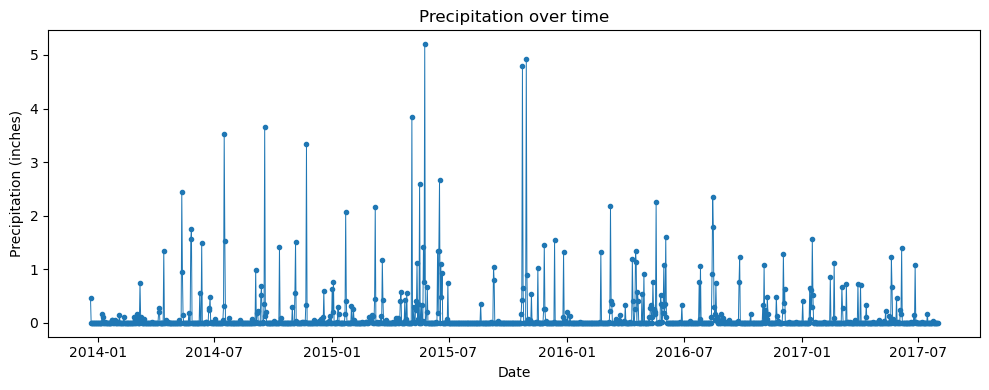

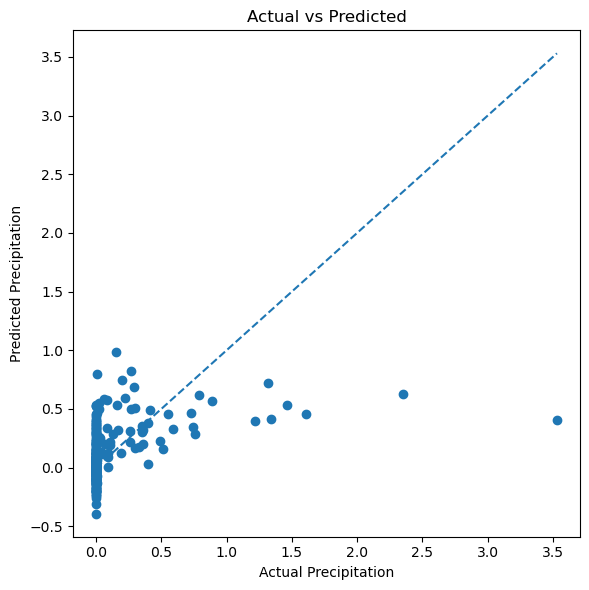

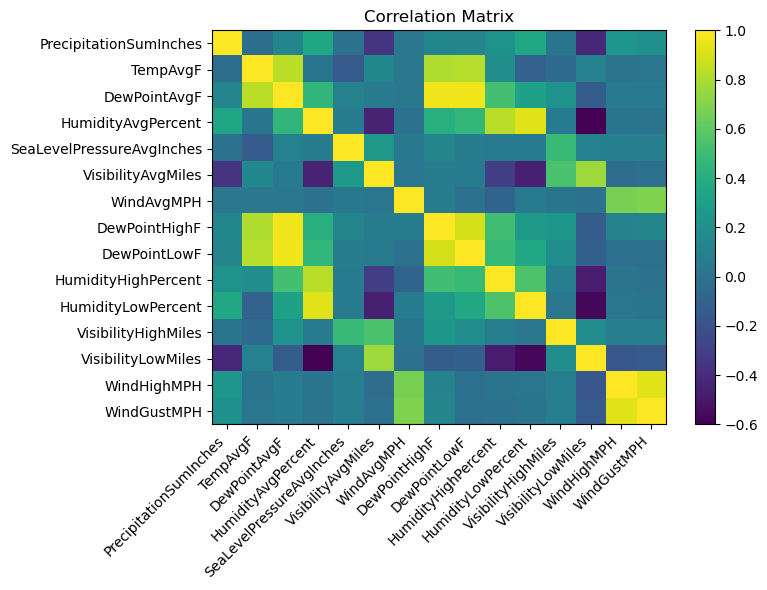

,PrecipitationSumInches,TempAvgF,DewPointAvgF,HumidityAvgPercent,SeaLevelPressureAvgInches,VisibilityAvgMiles,WindAvgMPH,DewPointHighF,DewPointLowF,HumidityHighPercent,HumidityLowPercent,VisibilityHighMiles,VisibilityLowMiles,WindHighMPH,WindGustMPH
PrecipitationSumInches,1.000000,-0.020442,0.127040,0.341382,-0.001954,-0.360945,0.033660,0.136159,0.126493,0.219735,0.359194,0.023162,-0.421734,0.241838,0.200363
TempAvgF,-0.020442,1.000000,0.837222,0.022763,-0.138524,0.148463,0.034267,0.808014,0.820421,0.192456,-0.096187,-0.043128,0.100722,0.014119,0.026663
DewPointAvgF,0.127040,0.837222,1.000000,0.450622,0.101505,0.056602,0.038257,0.967754,0.967514,0.520575,0.317731,0.216995,-0.129497,0.054142,0.062522
HumidityAvgPercent,0.341382,0.022763,0.450622,1.000000,0.069634,-0.449230,-0.000472,0.409717,0.458124,0.828398,0.923541,0.062050,-0.600088,0.024878,0.017390
SeaLevelPressureAvgInches,-0.001954,-0.138524,0.101505,0.069634,1.000000,0.260125,0.046604,0.128351,0.080703,0.054354,0.066901,0.484932,0.101484,0.090007,0.085081
VisibilityAvgMiles,-0.360945,0.148463,0.056602,-0.449230,0.260125,1.000000,0.026522,0.077431,0.064665,-0.304546,-0.459657,0.537715,0.766392,-0.027450,-0.008995
WindAvgMPH,0.033660,0.034267,0.038257,-0.000472,0.046604,0.026522,1.000000,0.074983,0.001407,-0.086840,0.058757,0.020734,0.003038,0.672828,0.690824
DewPointHighF,0.136159,0.808014,0.967754,0.409717,0.128351,0.077431,0.074983,1.000000,0.898026,0.510722,0.263818,0.250751,-0.130295,0.117151,0.125768
DewPointLowF,0.126493,0.820421,0.967514,0.458124,0.080703,0.064665,0.001407,0.898026,1.000000,0.481106,0.355761,0.184720,-0.104077,-0.013514,-0.008039
HumidityHighPercent,0.219735,0.192456,0.520575,0.828398,0.054354,-0.304546,-0.086840,0.510722,0.481106,1.000000,0.553781,0.084664,-0.477612,0.013986,0.004679


In [5]:

# Precipitation over time
plt.figure(figsize=(10,4))
plt.plot(df["Date"], df[target_col], marker=".", linewidth=0.7)
plt.title("Precipitation over time")
plt.xlabel("Date")
plt.ylabel("Precipitation (inches)")
plt.tight_layout()
plt.show()

# Actual vs Predicted
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle="--")
plt.xlabel("Actual Precipitation")
plt.ylabel("Predicted Precipitation")
plt.title("Actual vs Predicted")
plt.tight_layout()
plt.show()

# Correlation heatmap
corr_df = df[[target_col] + numeric_feature_candidates].corr()
plt.figure(figsize=(8,6))
plt.imshow(corr_df, aspect='auto')
plt.colorbar()
plt.xticks(ticks=np.arange(len(corr_df.columns)), labels=corr_df.columns, rotation=45, ha='right')
plt.yticks(ticks=np.arange(len(corr_df.index)), labels=corr_df.index)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

corr_df


## 6. Example Prediction

In [6]:

median_features = df[numeric_feature_candidates].median().values.reshape(1, -1)
pred_median = model.predict(median_features)[0]
print(f"Predicted precipitation (inches) for median feature values: {pred_median:.4f}")


Predicted precipitation (inches) for median feature values: 0.0240
